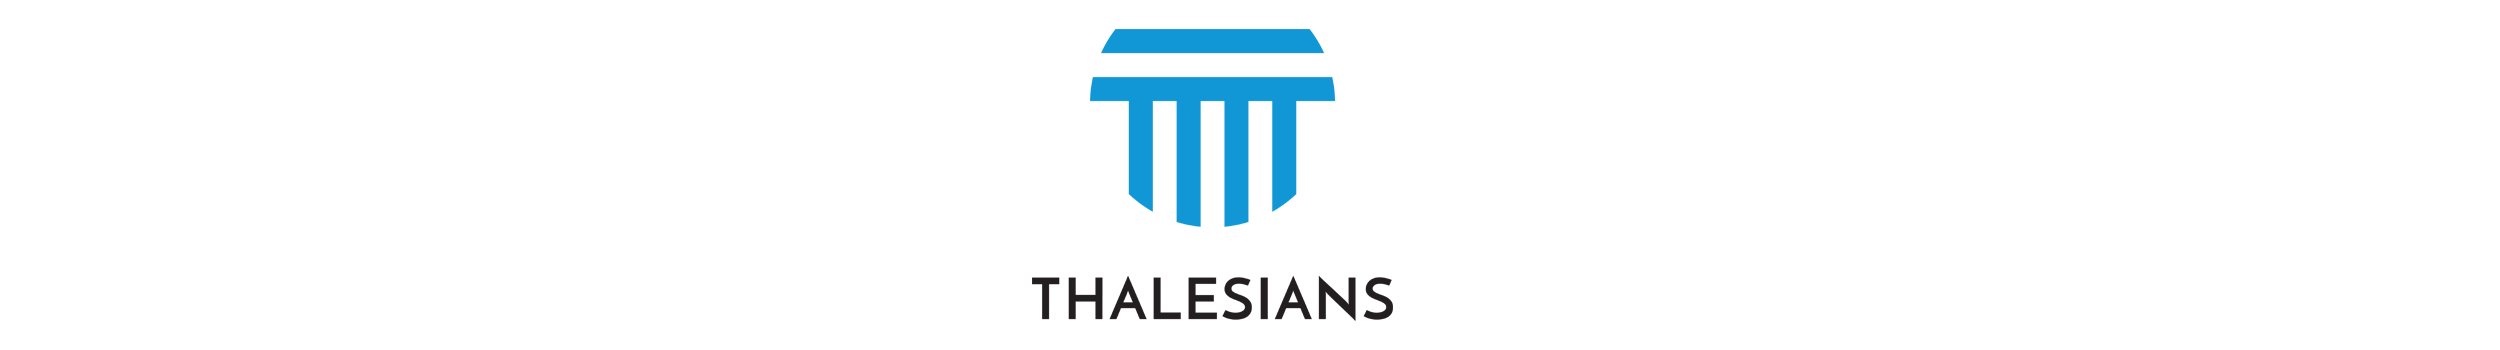

# Common libraries for data science

In [ ]:
# Copyright (c) Thalesians Ltd, 2021-2022. All rights reserved.
# Copyright (c) Paul Alexander Bilokon, 2021-2022. All rights reserved.
# Author: Paul Alexander Bilokon <paul@thalesians.com>
# Version: 2.0 (2022.06.22)
# Previous versions: 1.0 (2020.01.30)
# Email: info@thalesians.com

## Motivation

Two third-party (but *de facto* standard) Python libraries play a particular role in Data Analysis: `pandas` and NumPy.

The data types defined in `pandas` &mdash; `DataFrame` and `Series` &mdash; enable the data scientist to work effectively with tables. `pandas` provides some of the functionality that we find in SQL databases and spreadsheets. Since much of the data that we deal with comes in the form of tables, `pandas` is extremely useful.

NumPy provides a lower-level type &mdash; the multidimensional array. This data type is used as an underlying implementation by `pandas` `DataFrame`s and `Series`. NumPy arrays are used wherever bulk operations on numbers are needed in Python, which is what much of Data Science is about. NumPy arrays can be seen as a Python implementation of the key linear algebra object &mdash; the matrix.

## Objectives

1. To introduce `pandas` `DataFrames` and `Series`.
1. To show how... ...to quickly inspect a `pandas` `DataFrame`.
1. ...`pandas` `DataFrame`s can be indexed using `loc` and `iloc`.
1. ...`DataFrame`'s columns can be indexed.
1. ...to iterate through columns of a `DataFrame`.
1. ...a `DataFrame` can be effectively summarised.
1. ...to add a column to a `DataFrame`.
1. ...to overwrite a column in a `DataFrame`.
1. ...to rearrange columns in a `DataFrame`.
1. ...to delete a column from a `DataFrame`.
1. ...to apply a function to a column in a `DataFrame`.
1. ...to filter data in a `DataFrame` based on some boolean expression.
1. ...to deal with missing data (NaNs).
1. ...to use `groupby`.
1. ...to append to a `DataFrame`.
1. ...to join on a `DataFrame`.
1. ...to get at the NumPy arrays behind the `pandas` `DataFrame` and `Series`.
1. ...to define one-dimensional (flat) NumPy arrays.
1. ...to use `np.arange`, `np.linspace`, and `np.logspace`.
1. To explain the reasons to prefer NumPy arrays over standard Python data structures, such as lists.
1. To show how... ...to define two-dimensional NumPy arrays, thus implementing matrices.
1. ...to create NumPy arrays using `np.zeros`, `np.ones`, `np.full`, `np.empty`, `np.tile`.
1. ...to use 32-bit floating point numbers (`float32`) instead of 64-bit floating point numbers in NumPy arrays.
1. ...to generate random matrices.
1. ...to reshape matrices.
1. ...to multiply matrices by scalars.
1. ...to add matrices together.
1. ...to multiply matrices together.
1. ...to mix arrays and scalars in arithmetic operations; to explain broadcasting.
1. ...to transpose matrices.
1. ...to invert matrices.
1. ...to create identity matrices.
1. ...to stack NumPy arrays horizontally.
1. ...to stack NumPy arrays vertically.
1. ...to index NumPy arrays, including boolean indices.
1. ...to compare NumPy arrays.
1. ...to use some useful functions: `np.cumsum`, `np.cumprod`, `np.min`, `np.max`, `np.argmin`, `np.argmax`, `np.mean`, `np.var`, `np.std`.
1. ...to apply a function to each row/column in a NumPy array.
1. ...to use NumPy array flags.
1. ...to make NumPy arrays immutable (kind of).
1. ...to find out more about the configuration of the NumPy library, e.g. which BLAS it is using.

## `pandas` `DataFrame`s and `Series`

`pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. We can import it with

In [ ]:
import pandas as pd

The key data type provided by `pandas` is `DataFrame`. Let us create one:

In [ ]:
df = pd.DataFrame(
    {
        'transaction date': [2012.917, 2012.917, 2013.583, 2013.500, 2012.833, 2012.667, 2012.667, 2013.417, 2013.500, 2013.417, 2013.083, 2013.333, 2012.917, 2012.667, 2013.500],
        'distance to the nearest MRT station': [84.87882, 306.59470, 561.98450, 561.98450, 390.56840, 2175.03000, 623.47310, 287.60250, 5512.03800, 1783.18000, 405.21340, 90.45606, 492.23130, 2469.64500, 1164.83800],
        'number of convenience stores': [10, 9, 5, 5, 5, 3, 7, 6, 1, 3, 1, 9, 5, 4, 4],
        'latitude': [24.98298, 24.98034, 24.98746, 24.98746, 24.97937, 24.96305, 24.97933, 24.98042, 24.95095, 24.96731, 24.97349, 24.97433, 24.96515, 24.96108, 24.99156],
        'longitude': [121.54024, 121.53951, 121.54391, 121.54391, 121.54245, 121.51254, 121.53642, 121.54228, 121.48458, 121.51486, 121.53372, 121.54310, 121.53737, 121.51046, 121.53406],
        'house price per unit area': [37.9, 42.2, 47.3, 54.8, 43.1, 32.1, 40.3, 46.7, 18.8, 22.1, 41.4, 58.1, 39.3, 23.8, 34.3]
    },
    columns=[
        'transaction date',
        'distance to the nearest MRT station',
        'number of convenience stores',
        'latitude',
        'longitude',
        'house price per unit area'
    ])

`pandas` `DataFrame`s in many ways resemble SQL database tables and worksheets in spreadsheet applications.

### How to quickly inspect a `DataFrame`

Let's examine our newly created `DataFrame`:

In [ ]:
df

In practice, we may be dealing with `DataFrame`s containing thousands of rows of data (not fifteen, as in our example). So instead of looking at the entire `DataFrame` we may look at its...

In [ ]:
df.head()

We may wish to look at more rows from the `DataFrame`'s head:

In [ ]:
df.head(10)

Or examine its tail:

In [ ]:
df.tail()

### The index of the `DataFrame`, `loc` and `iloc`

Notice the numbers in bold on the left. These constitute the **index** of the `DataFrame`:

In [ ]:
list(df.index)

We can access the list of **columns** of the data frame through

In [ ]:
list(df.columns)

Thus the index indexes the rows, whereas the column names index the columns. We can access individual rows of the `DataFrame` through

In [ ]:
df.loc[3]

Notice that the index of the data frame doesn't have to be formed from integers starting with zero, as in our case

In [ ]:
list(df.index)

We could have chosen to index the rows with strings, `'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'`. Since the `DataFrame` is a **mutable** object, i.e. it can be changed after construction, we can replace its index accordingly:

In [ ]:
df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

In [ ]:
df.head()

Now we can index the rows with

In [ ]:
df.loc['D']

Whatever the index of the `DataFrame`, we can also refer to the rows through their integer offsets from the top, using `iloc` instead of `loc`:

In [ ]:
df.iloc[3]

Whereas the type of the entire object is

In [ ]:
type(df)

The type of `df.loc['D']` (equivalently, of `df.iloc[3]`) is

In [ ]:
type(df.loc['D'])

`Series` is the second most important type defined in the `pandas` package (after `DataFrame`).

### Indexing columns

As we said above, the list of columns in the dataframe is accessible through

In [ ]:
list(df.columns)

Individual columns can be indexed using

In [ ]:
df['latitude']

The type of the object thus obtained is

In [ ]:
type(df['latitude'])

You can also access multiple columns at once using

In [ ]:
df[['latitude', 'longitude']]

The type of the resulting object is `DataFrame`, rather than `Series`:

In [ ]:
type(df[['latitude', 'longitude']])

### Iterating through columns

Let us demonstrate how we can iterate through the columns of a `DataFrame`. In this example we shall store the first (0th) value from each column in a dictionary:

In [ ]:
firsts = {}
for c in df.columns:
    firsts[c] = df[c].iloc[0]

In [ ]:
firsts

### Summarising the `DataFrame`

Another quick way to obtain a high-level view of a (potentially very large) `DataFrame` is with

In [ ]:
df.info()

whereas the following will present summary statistics for each column:

In [ ]:
df.describe()

### Adding a column

To add a column, assuming the column `'house age'` does not yet exist:

In [ ]:
df['house age'] = [32.0, 19.5, 13.3, 13.3, 5.0, 7.1, 34.5, 20.3, 31.7, 17.9, 34.8, 6.3, 13.0, 20.4, 13.2]

In [ ]:
df.head()

### Overwriting a column

Similarly, if the column `'house age'` already exists,

In [ ]:
df['house age'] = [320., 195., 133., 133., 50., 71., 345., 203., 317., 179., 348., 63., 130., 204., 132.]

In [ ]:
df.head()

### Rearranging the columns

To rearrange the columns:

In [ ]:
df = df[[
    'transaction date', 'house age',
    'distance to the nearest MRT station', 'number of convenience stores',
    'latitude', 'longitude',
    'house price per unit area'
]]

In [ ]:
df.head()

### Deleting a column

In [ ]:
del df['house age']

In [ ]:
df.head()

### Applying a function to a column

In [ ]:
import math

In [ ]:
df['distance to the nearest MRT station'].apply(math.sqrt)

Notice that the original column hasn't been overwritten:

In [ ]:
df.head()

To overwrite it,

In [ ]:
df['distance to the nearest MRT station'] = df['distance to the nearest MRT station'].apply(math.sqrt)

In [ ]:
df.head()

To reverse what we have just done:

In [ ]:
df['distance to the nearest MRT station'] = df['distance to the nearest MRT station'].apply(lambda x: x * x)

In [ ]:
df.head()

### Filtering data

Suppose that we want to consider only those rows where the value in the column `'number of convenience stores'` is greater than or equal to 7. We can then index `df` by

In [ ]:
df['number of convenience stores'] >= 7

obtaining, as a result,

In [ ]:
df[df['number of convenience stores'] >= 7]

If we want to consider those rows where the `'number of convenience stores'` is greater than or equal to seven *or* the distance to the nearest MRT station is less than 500, we index the dataframe by

In [ ]:
(df['number of convenience stores'] >= 7) | (df['distance to the nearest MRT station'] < 500)

The result being

In [ ]:
df[(df['number of convenience stores'] >= 7) | (df['distance to the nearest MRT station'] < 500)]

If instead we want to consider those rows where the `'number of convenience stores'` is greater than or equal to seven *and* the distance to the nearest MRT station is less than 500, we index the dataframe by

In [ ]:
(df['number of convenience stores'] >= 7) & (df['distance to the nearest MRT station'] < 500)

The result being

In [ ]:
df[(df['number of convenience stores'] >= 7) & (df['distance to the nearest MRT station'] < 500)]

Suppose that we set `df1` to the above...

In [ ]:
df1 = df[(df['number of convenience stores'] >= 7) & (df['distance to the nearest MRT station'] < 500)]

In [ ]:
df1.loc['L', 'number of convenience stores'] = 100

We get a `SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame`. The **slice** (the **view** of a subset of the original `DataFrame`) has changed:

In [ ]:
df1

Whereas the original has not changed:

In [ ]:
df

For more information on this behaviour, read http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

### Dealing with missing data

Let us examine what happens if we have missing data in the `DataFrame`.

To this end, let us take a copy

In [ ]:
df_copy = df.copy()

and modify it like so:

In [ ]:
import numpy as np
df_copy.loc['C', 'distance to the nearest MRT station'] = np.nan
df_copy.loc['E', 'number of convenience stores'] = np.nan

In [ ]:
df_copy

The special `np.nan` value indicates that the data is missing or invalid (NaN stands for "not a number"). NaNs often result from numerical calculations. Their presence may interfere with further numerical work. One quick way to address the issue of NaNs is by dropping (removing) them:

In [ ]:
df_copy.dropna()

This has returned a copy of the `DataFrame` with all rows containing NaNs removed. `df_copy` itself has not been changed:

In [ ]:
df_copy

But we could overwrite it with the result of `dropna()`:

In [ ]:
df_copy = df_copy.dropna()

In [ ]:
df_copy

### `groupby`

It may be useful to summarise the `pandas` `DataFrame` for a given value of a particular column. This can be achieved using `groupby`. For example, we may wish to look at the mean of each column for each possible value of `'number of convenience stores'`:

In [ ]:
df.groupby('number of convenience stores').mean()

It looks like the house price per unit area may increase with the number of convenience stores, although we aren't particularly certain about this conclusion, whereas the distance to the nearest MRT station does seem to decrease as the number of convenience stores increases.

Instead of the mean, we may consider the minimum:

In [ ]:
df.groupby('number of convenience stores').min()

Or maximum:

In [ ]:
df.groupby('number of convenience stores').max()

### Appending to a `DataFrame`

Let us again consider our `DataFrame`,

In [ ]:
df

Suppose that we have another `DataFrame`,

In [ ]:
df1 = pd.DataFrame({
        'transaction date': [2013.417, 2013.083, 2012.917],
        'distance to the nearest MRT station': [378.90278, 90.23891, 489.32891],
        'number of convenience stores': [5, 6, 7],
        'latitude': [24.97432, 24.97435, 24.97428],
        'longitude': [121.53290, 121.53290, 121.53390],
        'house price per unit area': [33.2, 82.0, 32.1]
    },
    index = ['P', 'Q', 'R'],
    columns = ['transaction date', 'distance to the nearest MRT station', 'number of convenience stores',
              'latitude', 'longitude', 'house price per unit area']
)

In [ ]:
df1

We can append `df1` to the end of `df` using

In [ ]:
df.append(df1)

### Joining on a `DataFrame`

Let us again consider our `DataFrame`,

In [ ]:
df

Suppose we have another `DataFrame`,

In [ ]:
df_comments = pd.DataFrame({
        'comments': ['data to be validated', 'to be confirmed'],
    },
    index = ['H', 'J']
)

In [ ]:
df_comments

We can join `df_comments` onto `df` based on the matching indices:

In [ ]:
joined_df = df.join(df_comments)
joined_df

We may wish to replace the NaNs that have resulted in the `'comments'` column with blank strings:

In [ ]:
joined_df.loc[joined_df['comments'].isnull(), 'comments'] = ''

In [ ]:
joined_df

#### Exercise

Consider the `DataFrame`

In [ ]:
eg_df = pd.DataFrame({
        'date': ['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07'],
        'value': [3.78, 2.90, 3.29, 1.21, 3.20, 9.39, 8.90]
    },
    columns=['date', 'value'])
eg_df

Replace the default index with the parsed dates from the `'date'` column. Once this is done, remove the `'date'` column.

#### Solution

We can now use dates in `loc` to index this `DataFrame`:

In [ ]:
eg_df.loc[dt.date(2019, 9,  5)]

In [ ]:
eg_df.loc[dt.date(2019, 9,  5), 'value']

We can still use integers with `iloc`:

In [ ]:
eg_df.iloc[4]

#### Exercise

Consider again the `DataFrame`

In [ ]:
eg_df = pd.DataFrame({
        'date': ['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07'],
        'value': [3.78, 2.90, 3.29, 1.21, 3.20, 9.39, 8.90]
    },
    columns=['date', 'value'])

Find the mean, minimum, and maximum `'value'`. Use the library functions `numpy.mean`, `numpy.min`, and `numpy.max`.

#### Solution

We didn't have to explicitly use NumPy for this; we could have used

In [ ]:
eg_df.mean()

In [ ]:
eg_df.min()

In [ ]:
eg_df.max()

#### Exercise

Consider the `DataFrame`

In [ ]:
eg_df = pd.DataFrame({
        'date': ['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07'],
        'value': [3.78, 2.90, 3.29, 1.21, 3.20, 9.39, 8.90]
    },
    columns=['date', 'value'])
eg_df

Join it with another `DataFrame` so that, for dates `2019-09-03` and `2019-09-06` the comment `'missing data'` is added in the `'comments'` column.

#### Solution

#### Exercise

Consider the `DataFrame`

In [ ]:
eg_df = pd.DataFrame({
        'date': ['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07'],
        'value': [3.78, 2.90, 3.29, 1.21, 3.20, 9.39, 8.90]
    },
    columns=['date', 'value'])
eg_df

Two new data points become available. `9.89` for `2019-09-08` and `3.89` for `2019-09-09`. Append them to the `DataFrame`.

#### Solution

#### Exercise

In the `DataFrame` resulting from appending the data in the previous exercise, find the mean value for each day of the weak (Monday, Tuesday, Wednesday, etc.). You can get a weekday from a date using

In [ ]:
dt.date(2019, 9, 2).weekday()

#### Solution

## NumPy arrays

Many Python libraries (such as `pandas`) rely on NumPy under the hood. NumPy, imported with

In [ ]:
import numpy as np

implements **multidimensional arrays**.

### NumPy arrays behind the `pandas` `DataFrame` and `Series`

To access the underlying NumPy array of a `pandas` `DataFrame`, we can use `values`:

In [ ]:
df.values

This gives us the raw numerical data. Similarly, we can access the NumPy array behind the `Series` representing a specific column:

In [ ]:
df['transaction date'].values

Or row:

In [ ]:
df.loc['A'].values

### Defining one-dimensional (flat) NumPy arrays

Defining a **one-dimensional** (**flat**) array is easy: you can simply wrap a Python list:

In [ ]:
a = np.array([3.57, 4.18, 25.7])
a

In [ ]:
np.ndim(a)

In [ ]:
np.size(a)

In [ ]:
np.shape(a)

### `np.arange`, `np.linspace`, `np.logspace`

Often we want to obtain a result similar to that of `range` but for floating point numbers (rather than integers); we want to obtain an array of floating point numbers at equally spaced intervals (e.g. for plotting). In NumPy this is attained using `linspace`. Thus to obtain an array of fifteen equally spaced floating point numbers starting at -5. (inclusive), finishing at 10. (inclusive), we can use

In [ ]:
np.linspace(-5., 10., 15)

Notice that the arguments specifying the start and end of the interval are both inclusive: the first value is exactly `-5.`, the last value is exactly `10.`. This is unlike the arguments of Python's standard `range`: the start of the range is inclusive, but the end of the range is exclusive:

In [ ]:
list(range(-5, 10, 1))

Also note that the third argument of `np.linspace` is the total number of points to be produced, whereas the third argument of range is the step size. NumPy has a function `np.arange`, which is similar to `range`, but works with floating point arguments and produces NumPy arrays:

In [ ]:
np.arange(-5., 10., 1.25)

In [ ]:
np.arange(-5., 10., 1.)

`np.linspace` and `np.arange` are particularly useful for plotting:

In [ ]:
xs = np.linspace(0., 99. * math.pi / 8., 100)
ys = np.sin(xs)

We need the following cell magic to enable plotting in a Jupyter notebook:

In [ ]:
%matplotlib inline

And then we plot using the library Matplotlib (also known as `pyplot`):

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(xs, ys);

Instead of linearly (equally) spaced points, we can produce points spaced logarithmically using `np.logspace`:

In [ ]:
xs = np.logspace(start=0., stop=5., num=15, base=10.)
xs

In [ ]:
ys = [x**2 for x in xs]

Here we start with the zeroth power of ten and end with the fifth power of 10.

In [ ]:
plt.plot(xs, ys);

### Reasons to prefer NumPy arrays over standard Python data structures, such as lists

Suppose that we want to compute the sine of a number of regularly spaced angles (perhaps with a view of plotting the resulting graph):

In [ ]:
import math

In [ ]:
xs = [n * math.pi / 8. for n in range(10000)]
ys = [math.sin(x) for x in xs]

We can time the creation of each of the arrays, `xs` and `ys`, using the `timeit` cell magic:

In [ ]:
%timeit -o xs = [n * math.pi / 8. for n in range(10000)]

The creation of `xs` took about 6 milliseconds.

In [ ]:
%timeit -o ys = [math.sin(x) for x in xs]

The creation of `ys` took about 7 milliseconds.

We can replace the above Python lists with NumPy arrays and initialise them using **vectorised** operations (vectorised operations work on many values in one go), `np.linspace` and `np.sin`:

In [ ]:
xs = np.linspace(0., 9999. * math.pi / 8., 10000)
ys = np.sin(xs)

Let us time these operations.

In [ ]:
%timeit -o xs = np.linspace(0., 9999. * math.pi / 8., 10000)

In [ ]:
%timeit -o ys = np.sin(xs)

Vectorised operations on NumPy arrays take hundreds of *microseconds*, as opposed to *milliseconds* for Python lists, thus we have an order of magnitude improvement in speed.

Performance is one reason to prefer NumPy arrays over standard Python data structures, such as lists.

### Defining two-dimensional NumPy arrays (implementing matrices)

The real power of NumPy is in supporting two-dimensional, arrays, which can implement matrices:

In [ ]:
my_matrix = np.array([[4.28, 3.23, 5.87], [1.23, 5.32, 3.33]])
my_matrix

In [ ]:
np.ndim(my_matrix)

In [ ]:
np.size(my_matrix)

This particular two-dimensional NumPy array (matrix) is 2 by 3:

In [ ]:
np.shape(my_matrix)

### Other ways of creating NumPy arrays

Instead of creating NumPy arrays from (either nested or flat) Python lists, we could use NumPy utility functions.

In [ ]:
np.zeros((3,))

will create a one-dimensional array of zeros of size three, whereas

In [ ]:
np.zeros((3, 5))

will create a two-dimensional array of zeros with three rows and five columns. In each case, the argument (`(3,)`, `(3, 5)`) is a tuple specifying the shape of the NumPy array, giving the size of each of its dimensions.

`np.zeros` takes an optional `dtype` (data type) argument. Thus instead of 64-bit floating point numbers, we could use 32-bit floating point numbers:

In [ ]:
np.zeros((3, 5), dtype='float32')

Many GPUs are optimised for 32-bit, rather than 64-bit, precision.

Instead of an array of zeros, we could obtain an array of ones:

In [ ]:
np.ones((3,))

In [ ]:
np.ones((3, 5))

We could obtain an array with all values equal to a given number by multiplying the result of `np.ones` by that number:

In [ ]:
np.ones((3, 5)) * 7.5

However, it is more efficient (this only really matters for large arrays) to use `np.full`:

In [ ]:
np.full((3, 5), 7.5)

Unless you absolutely must initialise every value of an array to some number, it is most efficient to simply allocate the memory for the array (in which case you end up with whatever values that memory currently contains). This is done using `np.empty`:

In [ ]:
np.empty((3, 10))

You are then responsible for setting the elements of the array appropriately, perhaps using a numerical algorithm.

Because no initialisation takes place, `np.empty` is typically more efficient than `np.zeros`:

In [ ]:
%timeit -o np.zeros((3, 10))

In [ ]:
%timeit -o np.empty((3, 10))

In [ ]:
%timeit -o np.zeros((10000000,))

In [ ]:
%timeit -o np.empty((10000000,))

However, the operating system may initialise large newly allocated chunks of memory to zero for security reasons, which may make the difference in performance immaterial.

Matrices can also be created out of blocks using `np.tile`:

In [ ]:
np.tile([[4.28, 3.23, 5.87], [1.23, 5.32, 3.33]], (2, 3))

### Generating random matrices

NumPy's `np.random.random` returns random floats in the half-open interval $[0, 1)$. Results are sampled from the continuous uniform distribution over this interval.

In [ ]:
np.random.random((2, 3))

To sample from $\text{Uniform}[a, b)$, $b > a$, multiply the output by $(b - a)$ and add $a$:

In [ ]:
np.random.random((2, 3)) * 10. + 100.

### Reshaping matrices

Once a matrix has been created,

In [ ]:
my_matrix = np.array([[4.28, 3.23, 5.87], [1.23, 5.32, 3.33]])
my_matrix

Its shape,

In [ ]:
my_matrix.shape

can be changed:

In [ ]:
my_matrix.shape = (3, 2)
my_matrix

In [ ]:
my_matrix.shape = (6,)
my_matrix

In [ ]:
my_matrix.shape = ((6, 1))
my_matrix

In [ ]:
my_matrix.shape = ((1, 6))
my_matrix

We could also use `np.reshape`, which works on Python lists as well as NumPy arrays:

In [ ]:
my_reshaped_matrix = np.reshape(my_matrix, (2, 3))
my_reshaped_matrix

In [ ]:
my_matrix = my_reshaped_matrix

In [ ]:
np.reshape([[4.28, 3.23, 5.87], [1.23, 5.32, 3.33]], (6, 1))

### Multiplying matrices by scalars

Such matrices can be multiplied by scalars:

In [ ]:
3. * my_matrix

### Adding matrices

Added together:

In [ ]:
my_matrix + np.array([[3.00, 0., 0.], [5., 7., 0.]])

### Multiplying matrices

And multiplied by other compatible matrices:

In [ ]:
A = np.dot(my_matrix, np.array([[3., 1.], [1., -3.], [-3., -3.]]))
A

We can also realise this as

In [ ]:
my_matrix @ np.array([[3., 1.], [1., -3.], [-3., -3.]])

### Mixing arrays and scalars in arithmetic operations

We can mix arrays and scalars in arithmetic expressions:

In [ ]:
10. * my_matrix - 2. * my_matrix * my_matrix + 1.

The scalar is applied elementwise to each element of the array &mdash; we say that the scalar is **broadcast** across every element of the array:

In [ ]:
my_matrix

In [ ]:
10. * my_matrix

In [ ]:
10. * my_matrix + 1.

Arrays can also be broadcast:

In [ ]:
a = np.array([[1., 3., 2.], [5., 8., 7.], [3., 2., 1]])
a

In [ ]:
b = np.array([[101.], [102.], [103.]])
b

In [ ]:
a + b

### Transposing matrices

Matrices can be transposed (flipped on their side):

In [ ]:
A.T

In [ ]:
my_matrix.T

### Matrix inverses

NumPy can also be used to invert a matrix, i.e. to find such a matrix that, when multiplied by the given matrix, will give the identity matrix:

In [ ]:
Ainv = np.linalg.inv(A)
Ainv

In mathematics it is customary to denote the inverse of $A$ by $A^{-1}$. Let us check that the product $A A^{-1}$ is indeed equal to the identity matrix:

In [ ]:
np.dot(A, Ainv)

The product $A^{-1} A$ should also give the identity:

In [ ]:
np.dot(Ainv, A)

(Close enough.)

### The identity matrix

To obtain the identity matrix of a given size, we can use `np.eye`:

In [ ]:
np.eye(1)

In [ ]:
np.eye(2)

In [ ]:
np.eye(3)

### Stacking NumPy arrays horizontally

Let's say that we have a 5 by 4 NumPy array,

In [ ]:
array1 = np.array([
    [10., 20., 30., 40.],
    [50., 60., 70., 80.],
    [90., 100., 110., 120.],
    [130., 140., 150., 160.],
    [170., 180., 190., 200.]])
array1

and another 5 by 3 NumPy array,

In [ ]:
array2 = np.array([
    [1., 2., 3.],
    [4., 5., 6.],
    [7., 8., 9.],
    [10., 11., 12.],
    [13., 14., 15.]])
array2

We can stack these two arrays horizontally:

In [ ]:
np.hstack((array1, array2))

### Stacking NumPy arrays vertically

It is also possible to stack arrays vertically:

In [ ]:
array1 = np.array([
    [1., 2.],
    [3., 4.],
    [5., 6.]])

In [ ]:
array2 = np.array([
    [10., 20.]])

In [ ]:
array3 = np.array([
    [100., 200.],
    [300., 400.],
    [500., 600.],
    [700., 800.]])

In [ ]:
np.vstack((array1, array2, array3))

### Indexing NumPy arrays

Let us consider, for example, the NumPy array

In [ ]:
a = np.array([
    [10., 20., 30., 40.],
    [50., 60., 70., 80.],
    [90., 100., 110., 120.],
    [130., 140., 150., 160.],
    [170., 180., 190., 200.]])

To index a particular element of this array, we can use

In [ ]:
a[0, 0]

In [ ]:
a[2, 3]

NumPy arrays are mutable, so we can overwrite the values:

In [ ]:
a[2, 3] = a[2, 3] * 10.

In [ ]:
a

It is possible to index an entire row

In [ ]:
a[3, :]

or column

In [ ]:
a[:, 3]

We can thus set each element in a particular row to a specific value:

In [ ]:
a[3, :] = 100.

In [ ]:
a

More complex indexing enables us to access subblocks of a NumPy array

In [ ]:
a[0:4, 1:3]

In addition to the start index (inclusive) and end index (exclusive), we may also provide the step size:

In [ ]:
a[0:4:2, 1:3]

It is important that the result of **slicing** an array in this manner is a view of the original array:

In [ ]:
a

In [ ]:
b = a[0:4:2, 1:3]

In [ ]:
b

In [ ]:
b[:] = 1000.

In [ ]:
b

In [ ]:
a

Notice that the original array has changed. To avoid thid, take a copy of the slice:

In [ ]:
b = a[0:4:2, 1:3].copy()

### Boolean indexing

Just as `pandas` `DataFrame`s support boolean indexing, so do NumPy arrays:

In [ ]:
a > 5

In [ ]:
a[a > 5]

In [ ]:
a[a > 5] = 100.

In [ ]:
a

### Comparing arrays

One should be careful when comparing NumPy arrays, being mindful that one is dealing with floating point data.

In [ ]:
a = np.random.random(1000000)

In [ ]:
np.all(3 * (5 * a) * (7 * a) == 105 * a * a)

However, the maximum absolute difference between the corresponding elements is small:

In [ ]:
np.max(np.abs(3 * (5 * a) * (7 * a) - 105 * a * a))

Thus for most practical purposes the arrays are equal.

In [ ]:
np.max(np.abs(3 * (5 * a) * (7 * a) - 105 * a * a)) < 1e-12

### Some useful functions

Consider the matrix

In [ ]:
a = np.array([
    [3.29, 3.12, 9.49, 4.28, 9.93],
    [3.21, 9.93, 0.90, 8.90, 2.33],
    [5.32, 9.90, 1.23, 9.89, 2.39]
])

To find the cumulative sums:

In [ ]:
np.cumsum(a)

The cumulative products:

In [ ]:
np.cumprod(a)

The minimum:

In [ ]:
np.min(a)

The maximum:

In [ ]:
np.max(a)

The index at which the minimum is attained:

In [ ]:
np.argmin(a)

The index at which the maximum is attained:

In [ ]:
np.argmax(a)

The mean:

In [ ]:
np.mean(a)

The variance:

In [ ]:
np.var(a)

The standard deviation:

In [ ]:
np.std(a)

### Applying a function to each row or column

Consider the matrix

In [ ]:
a = np.array([
    [3.29, 3.12, 9.49, 4.28, 9.93],
    [3.21, 9.93, 0.90, 8.90, 2.33],
    [5.32, 9.90, 1.23, 9.89, 2.39]
])

Often we need to apply a function to each row or to each column of a matrix. In these cases `np.apply_along_axis` comes in useful.

For example, to find the mean of each row we could use

In [ ]:
np.apply_along_axis(np.mean, 1, a)

To find the mean of each column

In [ ]:
np.apply_along_axis(np.mean, 0, a)

### Flags; making NumPy arrays immutable

Let's again consider the NumPy array

In [ ]:
a = np.array([
    [3.29, 3.12, 9.49, 4.28, 9.93],
    [3.21, 9.93, 0.90, 8.90, 2.33],
    [5.32, 9.90, 1.23, 9.89, 2.39]
])

Let's have a look at its `flags`:

In [ ]:
a.flags

In particular, we see that the array is stored row-by-row (`C_CONTIGUOUS`) as opposed to column-by-column. Its transpose view will naturally be `F_CONTIGUOUS`:

In [ ]:
a.T.flags

Another useful flag is `WRITEABLE`. We may set it to `False` in order to make a NumPy array immutable. This is useful if we want to make sure that we don't accidentally change the values in the array, e.g. when we pass it round to functions:

In [ ]:
a[0, 0] = 9.23

In [ ]:
a.flags.writeable = False

Something like `a[0, 0] = 1.23` will now throw `ValueError: assignment destination is read-only`.

Of course, if someone *really* wants to modify the array, they can set

In [ ]:
a.flags.writeable = True

In [ ]:
a[0, 0] = 1.23

In [ ]:
a

### Finding out more about the configuration of the NumPy library

We can find out the version of the NumPy library using

In [ ]:
np.version.version

To check which BLAS (Basic Linear Algebra Subprograms, a lower level library) is being used by NumPy, use

In [ ]:
np.show_config()

Thus we see that Intel MKL BLAS routines are not being used, it's the OpenBLAS that we are using.

#### Exercise

Consider the matrix

In [ ]:
a = np.array([[3.89, 3.90, 1.39], [2.90, 4.32, 8.32], [5.32, 9.90, 8.98]])
a

The elements 3.89, 4.32, and 8.98 constitute the **diagonal** of this matrix. "Bump" the diagonal (increase each entry in the diagonal) by 10.0.

#### Solution

#### Exercise

Consider the matrix

In [ ]:
a = np.array([[3.89, 3.90, 1.39], [2.90, 4.32, 8.32], [5.32, 9.90, 8.98]])
a

Save the diagonal of this matrix in a flat (one-dimensional) numpy array.

#### Solution

#### Exercise

Stack the NumPy arrays to obtain a single matrix, where the top left block is the 3 by 3 identity matrix, the top right block the 3 by 4 zero matrix, the bottom left block the 4 by 3 matrix of ones, and the bottom right block the 4 by 4 matrix of 3s.

####  Solution

#### Exercise

What is the result of multiplying the matrix from the previous exercise by the vector (column matrix)

In [ ]:
v = np.array([[1.], [2.], [3.], [4.], [5.], [6.], [7.]])

#### Solution

#### Exercise

Consider the matrix

In [ ]:
a = np.array([
    [3.29, 3.12, 9.49, 4.28, 9.93],
    [3.21, 9.93, 0.90, 8.90, 2.33],
    [5.32, 9.90, 1.23, 9.89, 2.39]
])

Find the minimum in each even-indexed (0th, 2nd, etc.) column and the maximum in each odd-indexed (1st, 3rd, etc.) column.

#### Solution

#### Exercise

Use `np.zeros` and indexing to create the NumPy array

#### Solution